In [1]:
import cartopy.crs as ccrs
import cartopy
from cartopy import feature as cf
import xarray as xr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import metpy

In [2]:
import metpy.calc as mpcals
from metpy.units import units

In [3]:
single_level= xr.open_dataset("SingleLevel.nc")
multi_level= xr.open_dataset("MultiLevel.nc")
single_level

<xarray.Dataset>
Dimensions:    (longitude: 149, latitude: 133, time: 72)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 18.5 18.75 19.0
  * latitude   (latitude) float32 78.0 77.75 77.5 77.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    cbh        (time, latitude, longitude) float32 ...
    cape       (time, latitude, longitude) float32 ...
    ...         ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    totalx     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:38:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

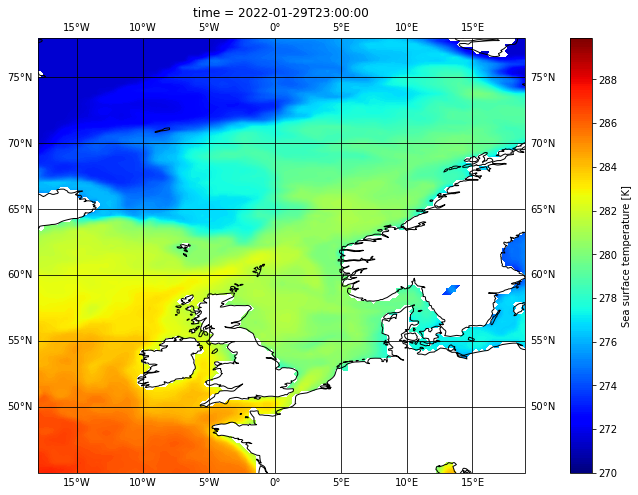

In [6]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.sst[i,:,:].plot.contourf(levels=np.arange(270, 290, 0.1),cmap='jet')
    plt.savefig(f'sst{i}.png')

In [7]:
single_level['hpamsl'] = single_level['msl']* 10**-2
single_level

<xarray.Dataset>
Dimensions:    (longitude: 149, latitude: 133, time: 72)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 18.5 18.75 19.0
  * latitude   (latitude) float32 78.0 77.75 77.5 77.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:00:00
Data variables: (12/14)
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    cbh        (time, latitude, longitude) float32 ...
    cape       (time, latitude, longitude) float32 ...
    ...         ...
    sst        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    totalx     (time, latitude, longitude) float32 ...
    hpamsl     (time, latitude, longitude) float32 1.01e+03 ... 1.021e+03
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:38:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

C:\Users\My\AppData\Local\Temp/ipykernel_4264/1014856800.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 8))


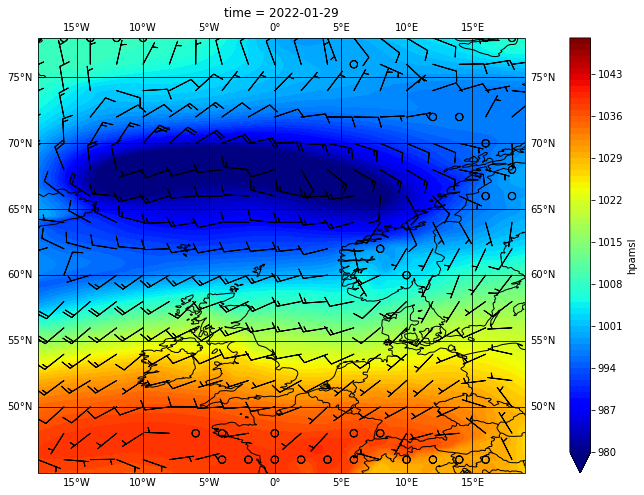

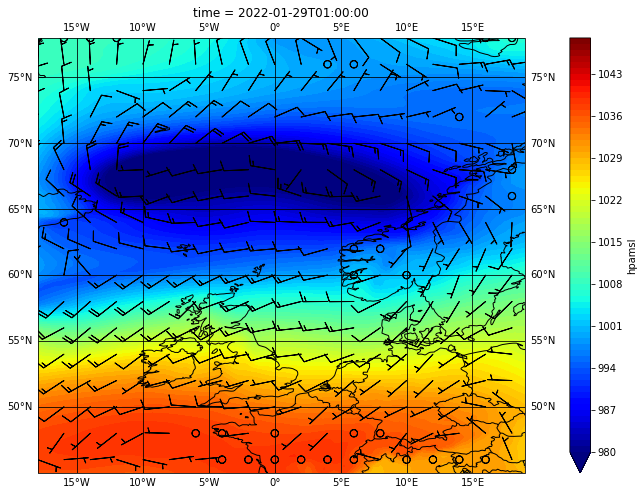

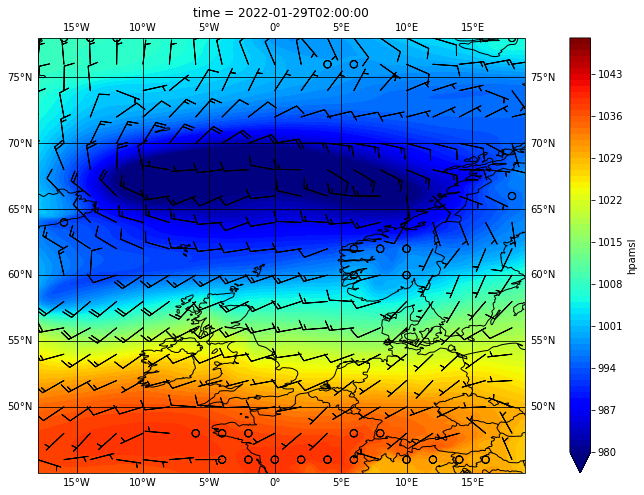

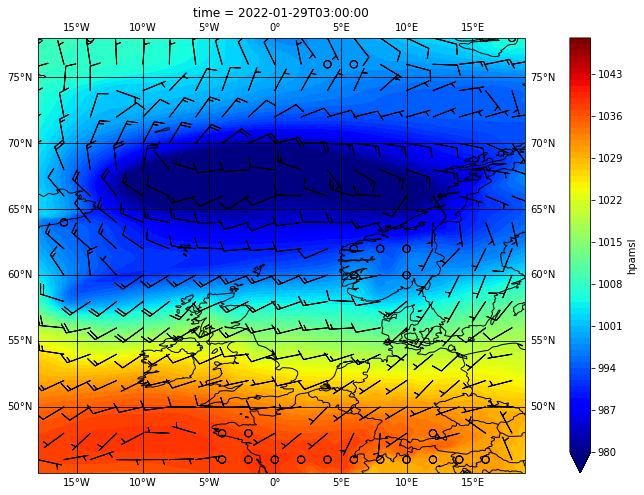

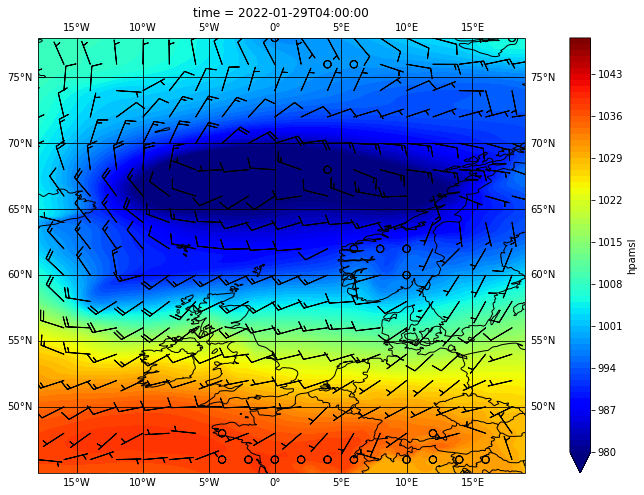

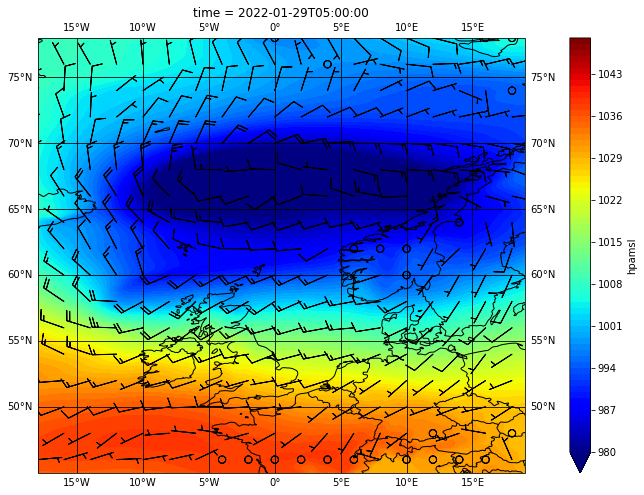

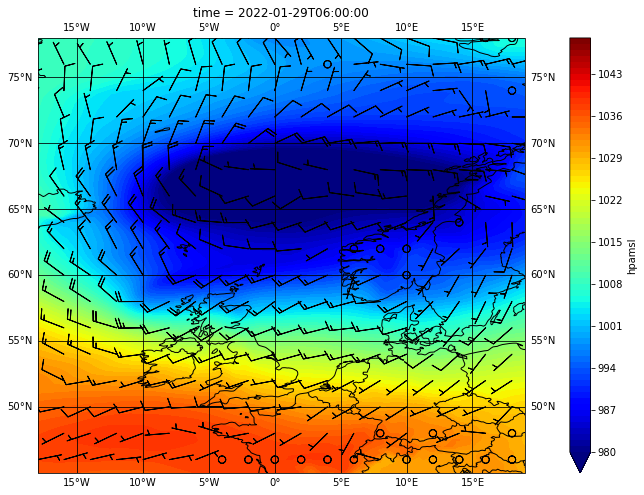

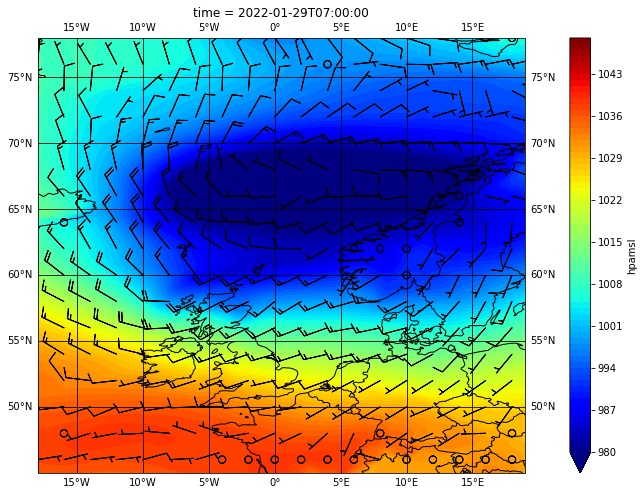

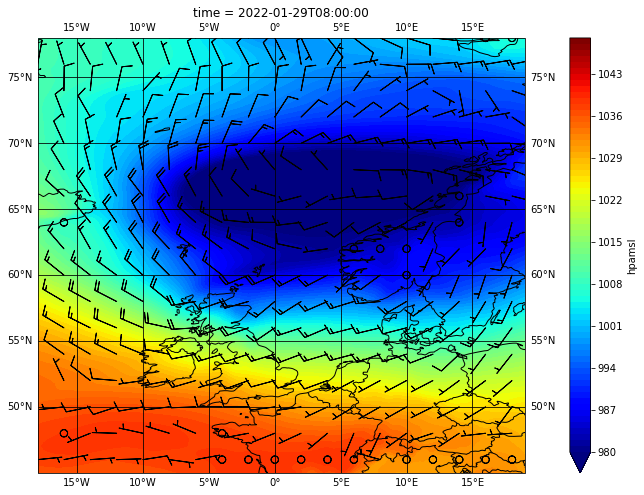

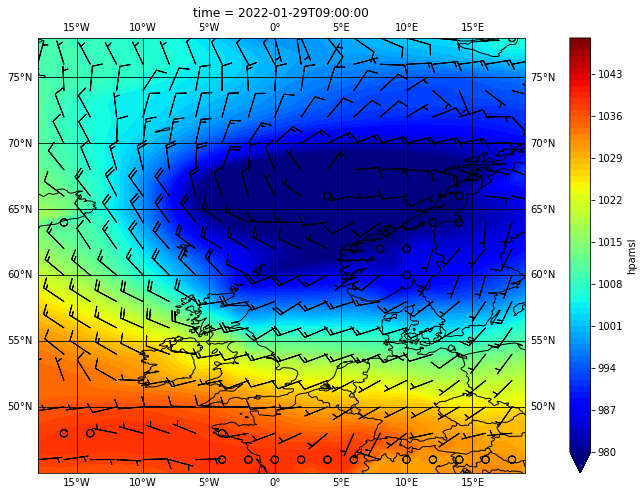

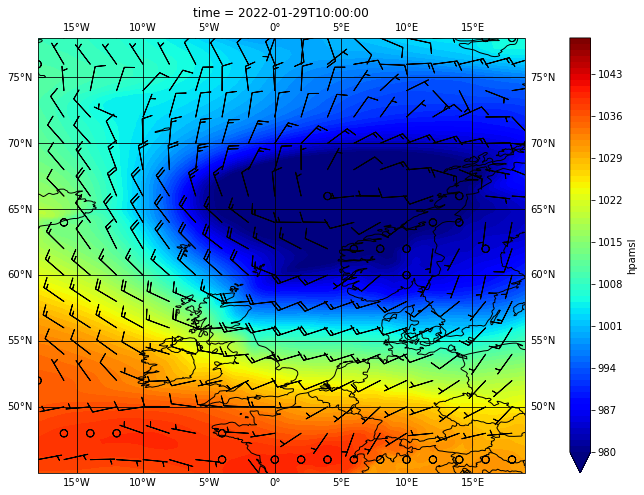

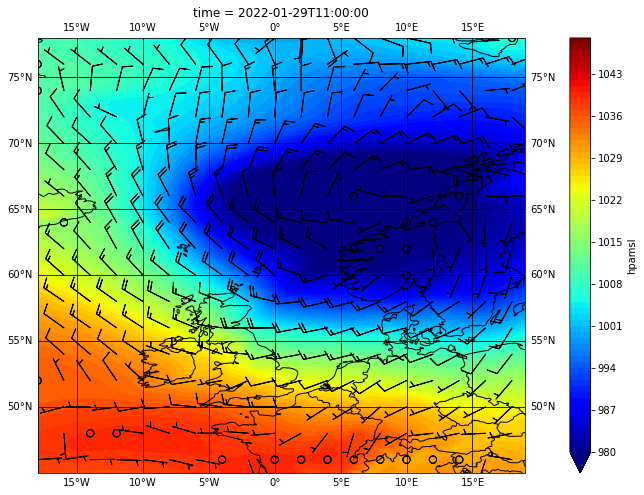

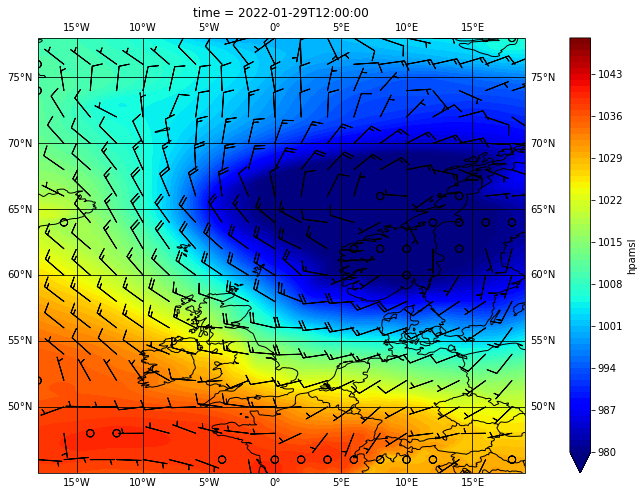

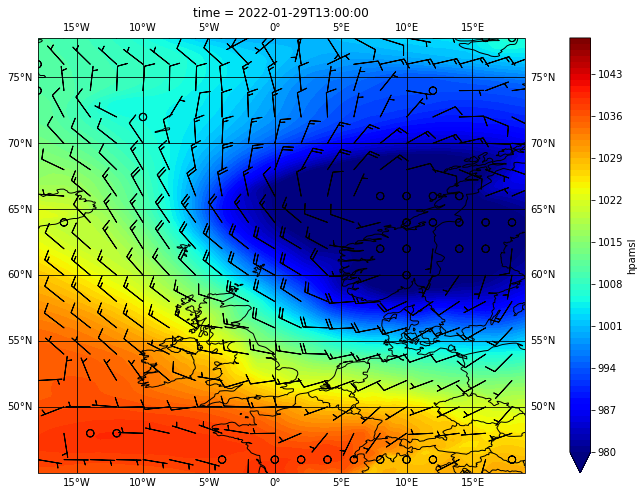

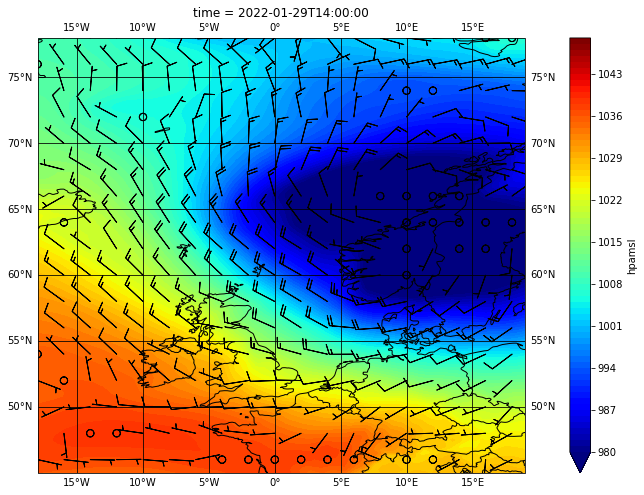

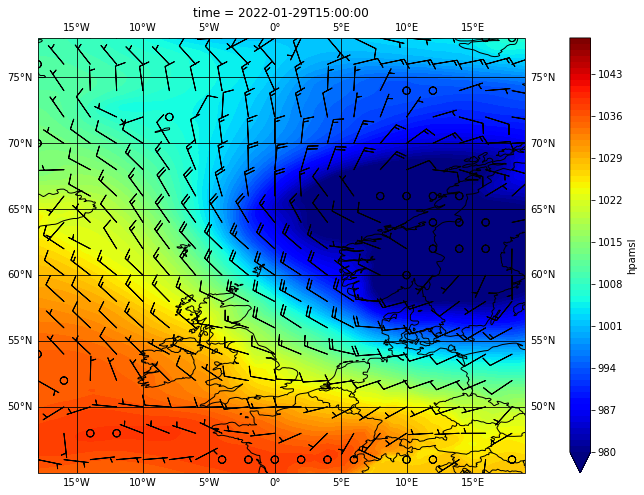

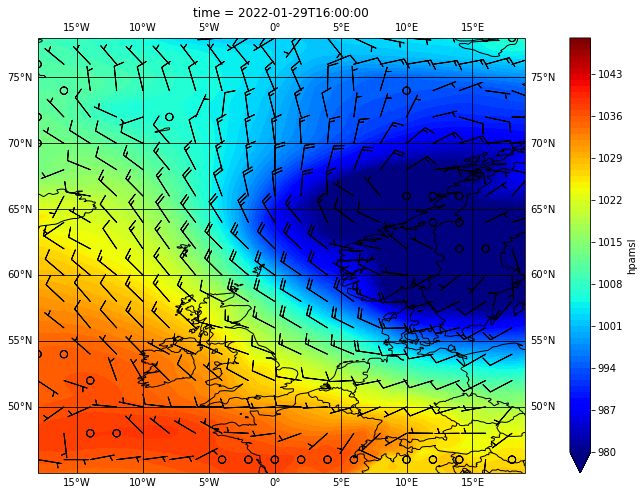

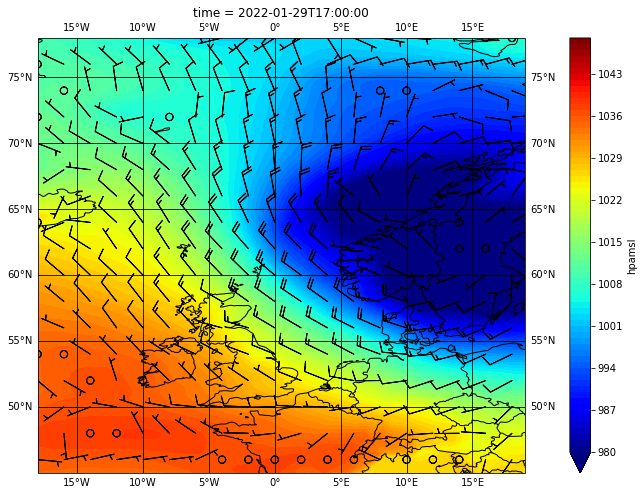

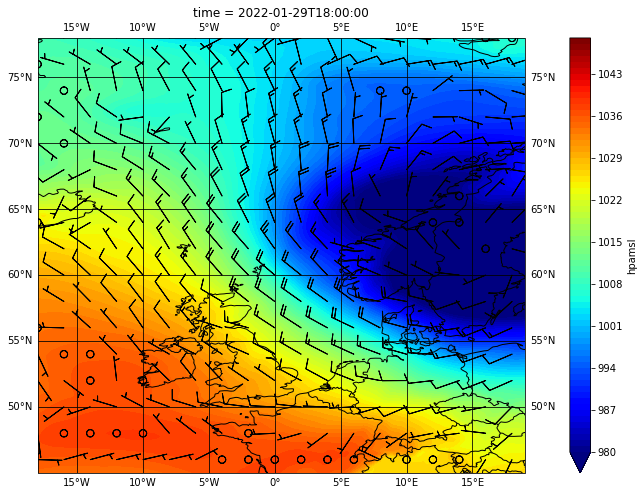

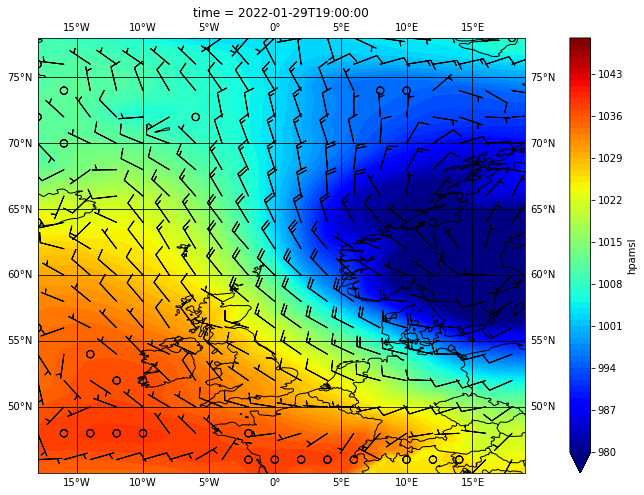

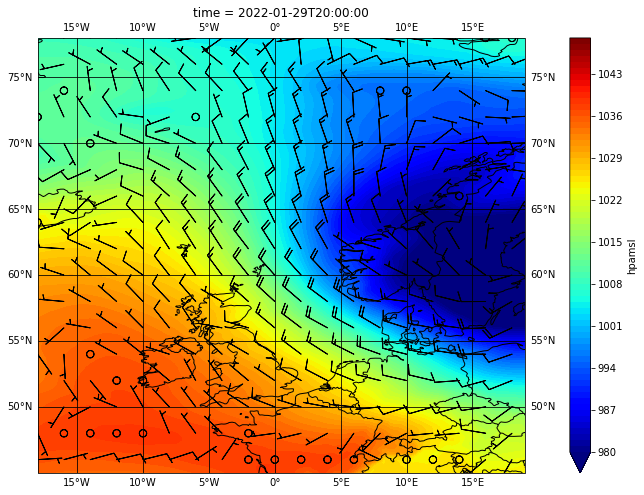

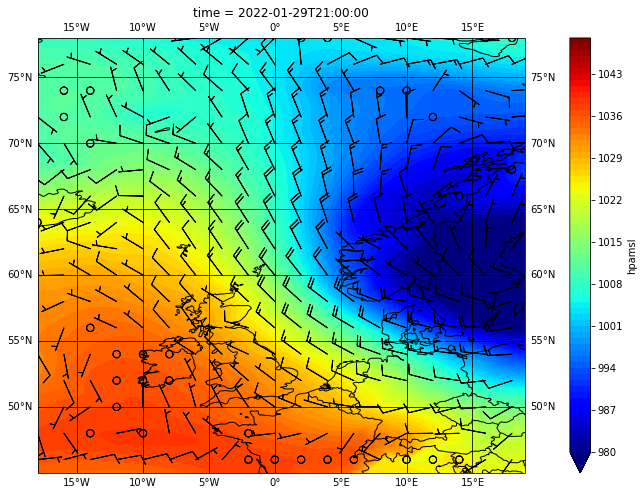

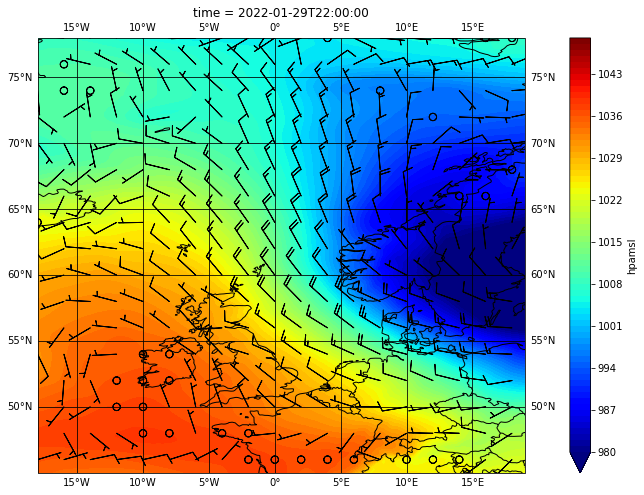

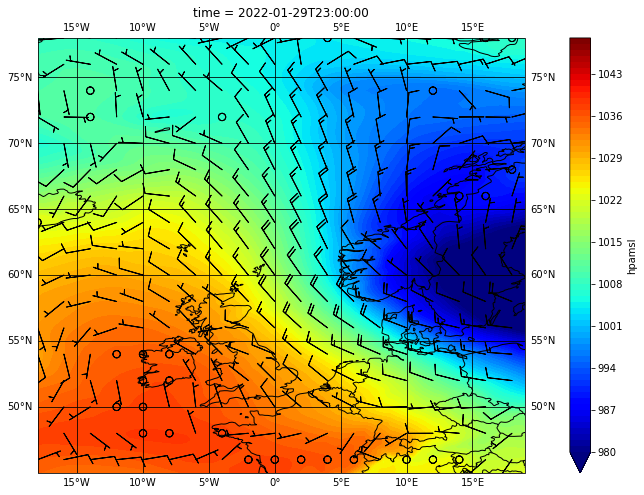

In [11]:
for i in range(24,48):
    X= single_level.longitude
    Y= single_level.latitude
    U=single_level.u10[i]
    V=single_level.v10[i]
    plt.figure(figsize=(16, 8))
    ax= plt.subplot(111, projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.gridlines(draw_labels=True, color='black')
    #data2.msl[10,:,:].plot.contour()
    
    single_level.hpamsl[i,:,:].plot.contourf(levels= np.arange(980, 1050, 1),cmap='jet')
    ax.barbs(X[::8],Y[::8],U[::8, ::8],V[::8, ::8])
    #ax.streamplot(X[::19],Y[::19],U[::19, ::19],V[::19, ::19])
    plt.savefig(f'windmsp{i}.png')